In [133]:
import os

### Downloading Dataset from Kaggle

In [134]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [135]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

  0% 0.00/1.90M [00:00<?, ?B/s]
100% 1.90M/1.90M [00:00<00:00, 183MB/s]


In [136]:
!unzip sentiment-analysis-on-movie-reviews.zip -d data

Archive:  sentiment-analysis-on-movie-reviews.zip
  inflating: data/sampleSubmission.csv  
  inflating: data/test.tsv.zip       
  inflating: data/train.tsv.zip      


In [137]:
train_fname = 'data/train.tsv.zip'
test_fname = 'data/test.tsv.zip'
sub_fname = 'data/sampleSubmission.csv'

### Data Exploration

In [138]:
import pandas as pd

In [139]:
df = pd.read_csv(train_fname, sep='\t')
test_df = pd.read_csv(test_fname, sep='\t')
sub_df = pd.read_csv(sub_fname)

In [140]:
df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [141]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [142]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


<Axes: >

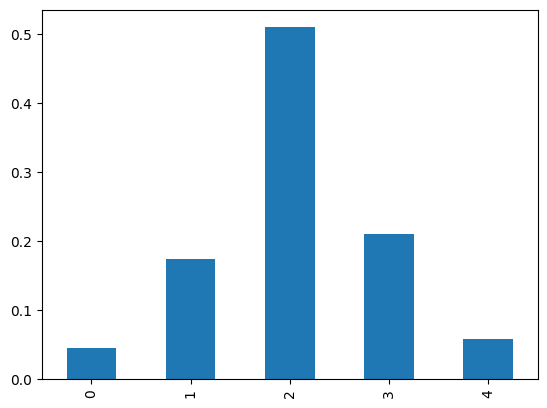

In [143]:
df['Sentiment'].value_counts(normalize=True).sort_index().plot(kind='bar')

## TF-IDF (Term Frequency-Inverse Document Frequency)


### Tokenize and Stem

In [144]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

In [145]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [146]:
stemmer = SnowballStemmer(language='english')

In [147]:
def tokenize(text):
  return [stemmer.stem(token) for token in word_tokenize(text) if token.isalpha()]

In [148]:
tokenize('Living is easy with eyes closed, misunderstanding all you see')

['live',
 'is',
 'easi',
 'with',
 'eye',
 'close',
 'misunderstand',
 'all',
 'you',
 'see']

### Remove Stopwords

In [149]:
from nltk.corpus import stopwords

In [150]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [151]:
english_stopwords = stopwords.words('english')

In [152]:
", ".join(english_stopwords[:105])

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why"

In [153]:
selected_stopwords = english_stopwords[:105]

### TF_IDF Vectorizer

In [154]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [155]:
vectorizer = TfidfVectorizer(tokenizer=tokenize, stop_words=selected_stopwords,
                             ngram_range=(1,2), max_features=2000)

In [156]:
vectorizer.fit(df['Phrase'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'becaus', 'befor', 'doe', 'dure', 'onc', 'ourselv', 'themselv', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


TfidfVectorizer(max_features=2000, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7f626f29a560>)

In [157]:
vectorizer.get_feature_names_out()[:250]

array(['abandon', 'abil', 'abl', 'abov', 'absolut', 'absorb', 'abstract',
       'absurd', 'abus', 'accent', 'accept', 'access', 'accomplish',
       'accur', 'ach', 'achiev', 'across', 'act', 'action', 'action film',
       'action movi', 'action sequenc', 'actor', 'actress', 'actual',
       'ad', 'adam', 'adam sandler', 'adapt', 'add', 'addit', 'adequ',
       'admir', 'admit', 'adolesc', 'adult', 'adventur', 'affair',
       'affect', 'afraid', 'age', 'ago', 'ahead', 'aim', 'aimless', 'air',
       'alien', 'aliv', 'all', 'all too', 'allen', 'allow', 'almost',
       'alon', 'along', 'alreadi', 'also', 'altern', 'although', 'alway',
       'amateurish', 'amaz', 'ambigu', 'ambit', 'ambiti', 'america',
       'american', 'among', 'amount', 'amus', 'analyz', 'angel', 'angst',
       'ani', 'ani other', 'anim', 'annoy', 'anoth', 'answer', 'anyon',
       'anyth', 'apart', 'appar', 'appeal', 'appear', 'appli', 'appreci',
       'approach', 'appropri', 'area', 'argu', 'argument', 'around

### Transform Training and Test Data

In [158]:
inputs = vectorizer.transform(df['Phrase'])

In [159]:
inputs.shape

(156060, 2000)

In [160]:
test_inputs = vectorizer.transform(test_df['Phrase'])

In [161]:
test_inputs.shape

(66292, 2000)

### Train Baseline Model

In [162]:
TRAIN_SIZE = 110_000

In [163]:
train_inputs = inputs[:TRAIN_SIZE]
train_targets = df['Sentiment'][:TRAIN_SIZE]

In [164]:
val_inputs = inputs[TRAIN_SIZE:]
val_targets = df['Sentiment'][TRAIN_SIZE:]

In [165]:
print(f'Train Input Shape {train_inputs.shape}')
print(f'Validation Input Shape {val_inputs.shape}')

Train Input Shape (110000, 2000)
Validation Input Shape (46060, 2000)


## Machine Learning Models

In [166]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report

### Logistic Regression Model

In [167]:
lr = LogisticRegression()
lr.fit(train_inputs, train_targets)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [168]:
lr_train_preds = lr.predict(train_inputs)
lr_val_preds = lr.predict(val_inputs)

In [169]:
print(f"Logistic Regression Training Accuracy: {100*(accuracy_score(train_targets, lr_train_preds).round(3))}%")
print(f"Logistic Regression Validation Accuracy: {100*(accuracy_score(val_targets, lr_val_preds).round(1))}%")

Logistic Regression Training Accuracy: 63.9%
Logistic Regression Validation Accuracy: 60.0%


In [170]:
lr_report_df = pd.DataFrame(classification_report(val_targets, lr_val_preds, output_dict=True))
lr_report_df

,0,1,2,3,4,accuracy,macro avg,weighted avg
precision,0.407066,0.480138,0.627407,0.496004,0.522604,0.580591,0.506644,0.555443
recall,0.124122,0.307326,0.842392,0.421920,0.201816,0.580591,0.379515,0.580591
f1-score,0.190237,0.374770,0.719177,0.455972,0.291184,0.580591,0.406268,0.548169
support,2135.000000,8613.000000,22740.000000,9708.000000,2864.000000,0.580591,46060.000000,46060.000000


### Multinomial Naive Bayes

In [171]:
mnb = MultinomialNB()
mnb.fit(train_inputs, train_targets)

MultinomialNB()

In [172]:
mnb_train_preds = mnb.predict(train_inputs)
mnb_val_preds = mnb.predict(val_inputs)

In [173]:
print(f"Naive Bayes Training Accuracy: {(round(accuracy_score(train_targets, mnb_train_preds), 4)) * 100}%")
print(f"Naive Bayes Validation Accuracy: {(round(accuracy_score(val_targets, mnb_val_preds), 4)) * 100}%")

Naive Bayes Training Accuracy: 58.46%
Naive Bayes Validation Accuracy: 54.37%


In [174]:
mnb_report_df = pd.DataFrame(classification_report(val_targets, mnb_val_preds, output_dict=True))
mnb_report_df

,0,1,2,3,4,accuracy,macro avg,weighted avg
precision,0.611111,0.519283,0.548426,0.508621,0.681081,0.54366,0.573704,0.545741
recall,0.025761,0.134448,0.938522,0.243098,0.043994,0.54366,0.277165,0.543660
f1-score,0.049438,0.213594,0.692304,0.328966,0.082650,0.54366,0.273390,0.458501
support,2135.000000,8613.000000,22740.000000,9708.000000,2864.000000,0.54366,46060.000000,46060.000000


### Predict and Submit

In [175]:
lr_test_preds = lr.predict(test_inputs)

In [176]:
sub_df['Sentiment'] = lr_test_preds

In [177]:
sub_df

,PhraseId,Sentiment
0,156061,3
1,156062,3
2,156063,2
3,156064,3
4,156065,3
...,...,...
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2


In [178]:
sub_df.to_csv('submission.csv', index=False)

### The End